## The Data: Pima Indian Classification

In [3]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv("../data/pima-indians-diabetes.data",header=None)

In [5]:
X=df[np.arange(8)]
y=df[8]

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf1 = DecisionTreeClassifier(random_state=1)
clf2 = GaussianNB()
clf3 = LogisticRegression()
clf4 = KNeighborsClassifier(n_neighbors=5)

In [7]:
from sklearn.model_selection import cross_val_score
print (cross_val_score(clf1, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf2, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf3, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf4, X, y, cv=10,scoring="accuracy").mean())

0.70960355434
0.756493506494
0.766968557758
0.721377306904


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
preds={}
preds["DecisionTreeClassifier"]=clf1.predict(X_test)
preds["Gaussian"]=clf2.predict(X_test)
preds["Logistic"]=clf3.predict(X_test)
preds["KNeighbors"]=clf4.predict(X_test)

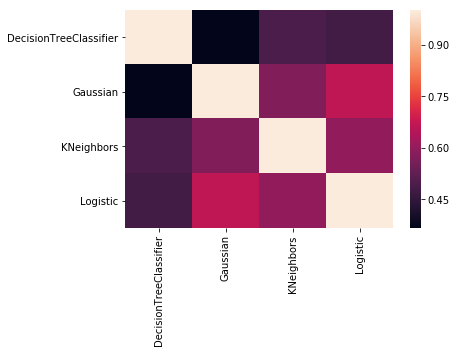

In [12]:
import seaborn as sns
sns.heatmap(pd.DataFrame(preds).corr())
plt.show()

## Voting

In [13]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('tree', clf1), ('gaussian', clf2),("Kneighbors",clf4)])
print (cross_val_score(eclf, X, y, cv=10,scoring="accuracy").mean())

0.75


## Stacking

In [14]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
mr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf3, clf2, clf4], meta_classifier=mr)

In [30]:
print (cross_val_score(clf1, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf2, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf3, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(clf4, X, y, cv=10,scoring="accuracy").mean())
print (cross_val_score(sclf, X, y, cv=10,scoring="accuracy").mean())

0.70960355434
0.756493506494
0.766968557758
0.721377306904
0.730502392344


## Bagging

In [172]:
from sklearn.ensemble import BaggingClassifier

In [173]:
bclf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)

In [174]:
print (cross_val_score(bclf, X, y, cv=10,scoring="accuracy").mean())

0.765669856459


In [175]:
bclf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

In [176]:
print (cross_val_score(bclf, X, y, cv=10,scoring="accuracy").mean())

0.764285714286


## Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rand = RandomForestClassifier(n_estimators=100,max_depth=4)

In [179]:
rand.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [180]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

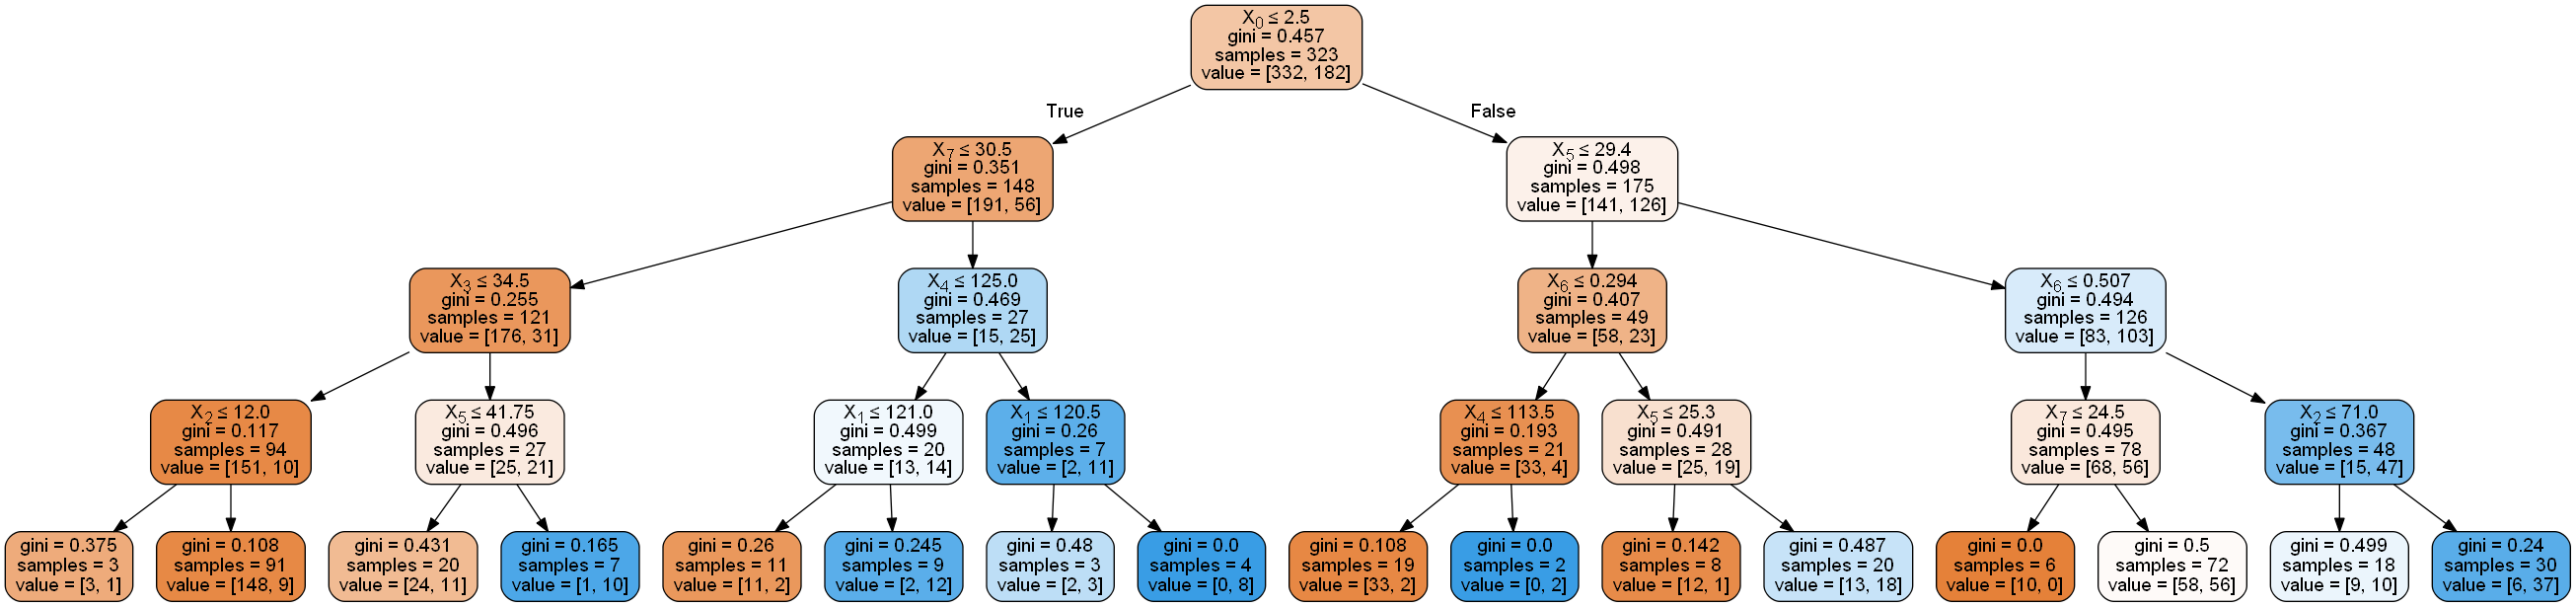

In [181]:
dot_data = tree.export_graphviz(rand.estimators_[6], out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

In [182]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

0.753896103896


## Boosted Trees with sklearn

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
rand = GradientBoostingClassifier(n_estimators=100)

In [36]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

0.769480519481


In [33]:
from xgboost import XGBClassifier

In [44]:
rand = XGBClassifier(n_estimators=100)

In [45]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

0.769480519481


## Metrics

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [202]:
rand.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [203]:
print(accuracy_score(y_test,rand.predict(X_test)))

0.728346456693


In [204]:
print(classification_report(y_test,rand.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.77      0.79       168
          1       0.59      0.64      0.61        86

avg / total       0.73      0.73      0.73       254



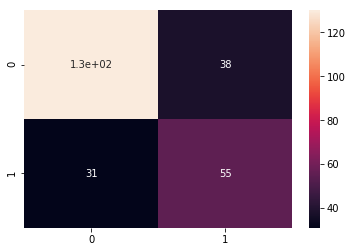

In [205]:
sns.heatmap(confusion_matrix(y_test,rand.predict(X_test)),annot=True)